# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Radiptha Surya Narayan
- **Email:** 2022105391@student.kalbis.ac.id
- **ID Dicoding:** radiptha_narayan_6yBK

## Menentukan Pertanyaan Bisnis

- Apa pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Bagaimana perbedaan pola penggunaan antara pengguna terdaftar dan pengguna kasual selama hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan


In [119]:
import streamlit as st  # Digunakan untuk membuat aplikasi web interaktif
import pandas as pd  # Digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Digunakan untuk membuat visualisasi statis, interaktif, dan animasi
import folium  # Digunakan untuk membuat peta interaktif
import seaborn as sns  # Digunakan untuk membuat grafik statistik

## Data Wrangling

### Gathering Data

Tabel hour

In [120]:
# Mengimpor modul drive dari library google.colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke direktori '/content/drive' dengan force_remount=True
# untuk memastikan drive di-mount ulang meskipun sudah ter-mount sebelumnya.
drive.mount('/content/drive', force_remount=True)

# Menentukan path ke file 'hour.csv' di Google Drive
file_path_hour = '/content/drive/My Drive/hour.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_hour'
data_hour = pd.read_csv(file_path_hour)

# Menampilkan 5 baris pertama dari DataFrame 'data_hour' untuk melihat pratinjau data
data_hour.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Tabel day

In [121]:
# Mengimpor modul drive dari library google.colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke direktori '/content/drive' dengan force_remount=True
# untuk memastikan drive di-mount ulang meskipun sudah ter-mount sebelumnya.
drive.mount('/content/drive', force_remount=True)

# Menentukan path ke file 'day.csv' di Google Drive
file_path_day = '/content/drive/My Drive/day.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_day'
data_day = pd.read_csv(file_path_day)

# Menampilkan 5 baris pertama dari DataFrame 'data_day' untuk melihat pratinjau data
data_day.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Berdasarakan code diatas digunakan untuk proses mengumpulkan informasi atau data yang diperlukan untuk tujuan analisis berisi beberapa faktor seperti hari, cuacah, waktu. Informasi ini memberikan gambaran yang berguna bagi penyedia layanan penyewaan sepeda untuk membuat strategi pemasaran yang lebih efektif

### Assessing Data

Tabel hour

In [40]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [39]:
data_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [38]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
print("Jumlah duplikasi: ",data_hour.duplicated().sum())

Jumlah duplikasi:  0


tabel day

In [41]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
data_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [43]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [44]:
print("Jumlah duplikasi: ",data_day.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Dapat disimpulkan bahwa data yang ada tidak menunjukkan adanya masalah seperti duplikasi tetapi ada data ynag yang terbaca sebagai string

### Cleaning Data

tabel hour

In [52]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Memperbaiki data

In [117]:
# Mendefinisikan list yang berisi nama kolom yang akan diubah tipe datanya menjadi datetime
datetime_columns = ["dteday"]

# Melakukan loop untuk setiap kolom di dalam list datetime_columns
for column in datetime_columns:
    # Mengubah tipe data kolom menjadi datetime menggunakan pd.to_datetime() dari pandas
    data_day[column] = pd.to_datetime(data_day[column])

# Menampilkan informasi DataFrame data_day setelah perubahan tipe data
print(data_day.info())

# Menampilkan 5 baris pertama dari DataFrame data_day untuk melihat pratinjau data setelah perubahan
print(data_day.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tabel day

In [48]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memperbaiki data

In [118]:
# Mendefinisikan list yang berisi nama kolom yang akan diubah menjadi tipe data datetime
datetime_columns = ["dteday"]

# Melakukan iterasi (loop) untuk setiap kolom di dalam list datetime_columns
for column in datetime_columns:
    # Mengubah tipe data kolom menjadi datetime menggunakan pd.to_datetime() dari pandas
    data_day[column] = pd.to_datetime(data_day[column])

# Menampilkan informasi DataFrame data_day setelah perubahan tipe data, termasuk tipe data setiap kolom
print(data_day.info())

# Menampilkan 5 baris pertama dari DataFrame data_day untuk melihat pratinjau data setelah perubahan
print(data_day.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Memperbaiki type data Membuat menghindari kesalahan yang bisa terjadi jika data tanggal tetap disimpan dalam format string atau objek

## Exploratory Data Analysis (EDA)

### Explore ...

Explore hour

In [54]:
data_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8494,8495,2011-12-25,1,0,12,15,0,0,0,1,0.34,0.3333,0.61,0.1940,43,48,91
16574,16575,2012-11-28,4,1,11,8,0,3,1,1,0.24,0.2121,0.60,0.2836,9,683,692
14388,14389,2012-08-27,3,1,8,17,0,1,1,1,0.80,0.7273,0.46,0.2239,101,744,845
11645,11646,2012-05-05,2,1,5,10,0,6,0,1,0.66,0.6212,0.65,0.1343,148,284,432
4229,4230,2011-06-30,3,0,6,3,0,4,1,1,0.60,0.6061,0.60,0.1642,2,7,9


In [55]:
data_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [57]:
data_hour.instant.is_unique

True

In [60]:
data_hour.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

instant  temp                                cnt              \
       nunique   max   min      mean       std      sum        mean   
season                                                                
1         4242  0.72  0.02  0.299147  0.118726   471348  111.114569   
2         4409  0.94  0.16  0.544663  0.139233   918589  208.344069   
3         4496  1.00  0.38  0.706410  0.093903  1061129  236.016237   
4         4232  0.76  0.14  0.423138  0.122167   841613  198.868856   

                    
               std  
season              
1       119.224010  
2       188.362473  
3       197.711630  
4       182.967972

In [63]:
data_hour.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
3,4496
2,4409
1,4242
4,4232


In [64]:
data_hour.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
6,2512
0,2502
5,2487
1,2479
3,2475
4,2471
2,2453


Explore day

In [65]:
data_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
84,85,2011-03-26,2,0,3,0,6,0,1,0.265833,0.257571,0.394167,0.209571,981,1515,2496
446,447,2012-03-22,2,1,3,0,4,1,1,0.554167,0.531567,0.831250,0.117562,1334,5537,6871
481,482,2012-04-26,2,1,4,0,4,1,2,0.498333,0.483583,0.756667,0.176625,475,4551,5026
59,60,2011-03-01,1,0,3,0,2,1,1,0.266667,0.263879,0.535000,0.216425,137,1714,1851
18,19,2011-01-19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650


In [66]:
data_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [67]:
data_day.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

instant      temp                                    cnt               \
       nunique       max       min      mean       std      sum         mean   
season                                                                         
1          181  0.572500  0.059130  0.297748  0.102735   471348  2604.132597   
2          184  0.808333  0.253043  0.544405  0.122650   918589  4992.331522   
3          188  0.861667  0.469167  0.706309  0.070848  1061129  5644.303191   
4          178  0.657500  0.220833  0.422906  0.107834   841613  4728.162921   

                     
                std  
season               
1       1399.942119  
2       1695.977235  
3       1459.800381  
4       1699.615261

In [68]:
data_day.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
3,188
2,184
1,181
4,178


In [69]:
data_day.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
0,105
1,105
6,105
2,104
3,104
4,104
5,104


Explore all data

Menghubungkan semua data

In [70]:
merged_df = pd.merge(
    left=data_day,
    right=data_hour,
    how="left",
    left_on="instant",
    right_on="instant"
)
merged_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [75]:
result_df = merged_df.groupby(by=["season_x", "hr"]).agg({
    "temp_x": "mean",
    "cnt_x": "sum",
})
result_df.head()


temp_x  cnt_x
season_x hr                 
1        0   0.326310  19185
         1   0.357521  18046
         2   0.307262  16533
         3   0.241286   9024
         4   0.315538  18392

In [78]:
result_df = merged_df.groupby(by=["season_y", "hr"]).agg({
    "temp_x": "mean",
    "cnt_x": "sum",
})
result_df.head()


temp_x   cnt_x
season_y hr                  
1        0   0.513898  148708
         1   0.522263  146131
         2   0.501206  136188
         3   0.465245   92691
         4   0.465776   95792

In [83]:
result_day_hour = merged_df.groupby(by="season_x").agg({
    "instant": "nunique",
    "cnt_x": "sum",
    "cnt_y": "sum",
}).sort_values(by="cnt_x", ascending=False)
result_day_hour.head()

,instant,cnt_x,cnt_y
season_x,,,
3,188,1061129,9995
2,184,918589,11045
4,178,841613,9841
1,181,471348,9984


In [84]:
result_day_hour = merged_df.groupby(by=["season_x", "hr"]).agg({
    "instant": "nunique",
    "cnt_x": "sum",
    "cnt_y": "sum",
}).sort_values(by="cnt_x", ascending=False)
result_day_hour.head()

instant  cnt_x  cnt_y
season_x hr                       
3        11        9  54266    407
         13        9  53414    579
         10        9  53288    421
         12        8  50174    551
         16        9  48470    644

**Insight:**
Berdasarkan hasil EDA pada data terlihat bahwa penggunaan sepeda dipengaruhi oleh faktor musim dan hari dalam seminggu, Musim yang lebih hangat menunjukkan penggunaan sepeda yang lebih tinggi, sementara musim dingin cenderung lebih rendah, mencerminkan pengaruh kondisi cuaca terhadap keputusan bersepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:Apa pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

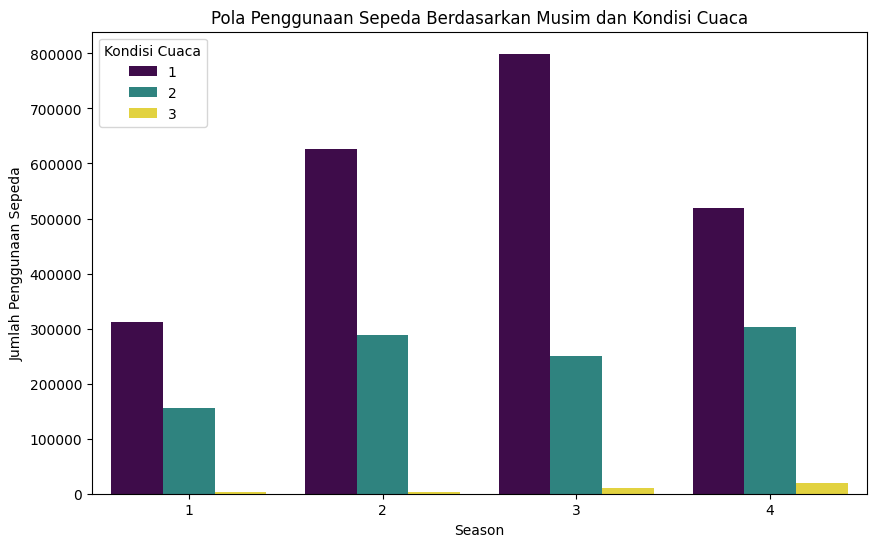

In [123]:
# Mengelompokkan data berdasarkan musim (season_x) dan kondisi cuaca (weathersit_x),
# lalu menjumlahkan total penggunaan sepeda (cnt_x) untuk setiap kelompok.
# Hasilnya disimpan dalam DataFrame baru bernama season_weather_usage.
season_weather_usage = merged_df.groupby(['season_x', 'weathersit_x'])['cnt_x'].sum().reset_index()

# Membuat figure (area plot) dengan ukuran 10x6 inci.
plt.figure(figsize=(10,6))

# Membuat bar plot menggunakan seaborn (sns) dengan:
# - x: musim (season_x)
# - y: jumlah penggunaan sepeda (cnt_x)
# - hue: kondisi cuaca (weathersit_x) untuk mengelompokkan bar berdasarkan kondisi cuaca
# - data: DataFrame season_weather_usage sebagai sumber data
# - palette: "viridis" untuk menentukan skema warna bar
sns.barplot(x='season_x', y='cnt_x', hue='weathersit_x', data=season_weather_usage, palette="viridis")

# Menambahkan judul plot
plt.title("Pola Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca")

# Menambahkan label sumbu x
plt.xlabel("Season")

# Menambahkan label sumbu y
plt.ylabel("Jumlah Penggunaan Sepeda")

# Menambahkan legend (keterangan) dengan judul "Kondisi Cuaca" dan ditempatkan di kiri atas
plt.legend(title="Kondisi Cuaca", loc='upper left')

# Menampilkan plot
plt.show()

### Pertanyaan 2:Bagaimana perbedaan pola penggunaan antara pengguna terdaftar dan pengguna kasual selama hari kerja dan akhir pekan?

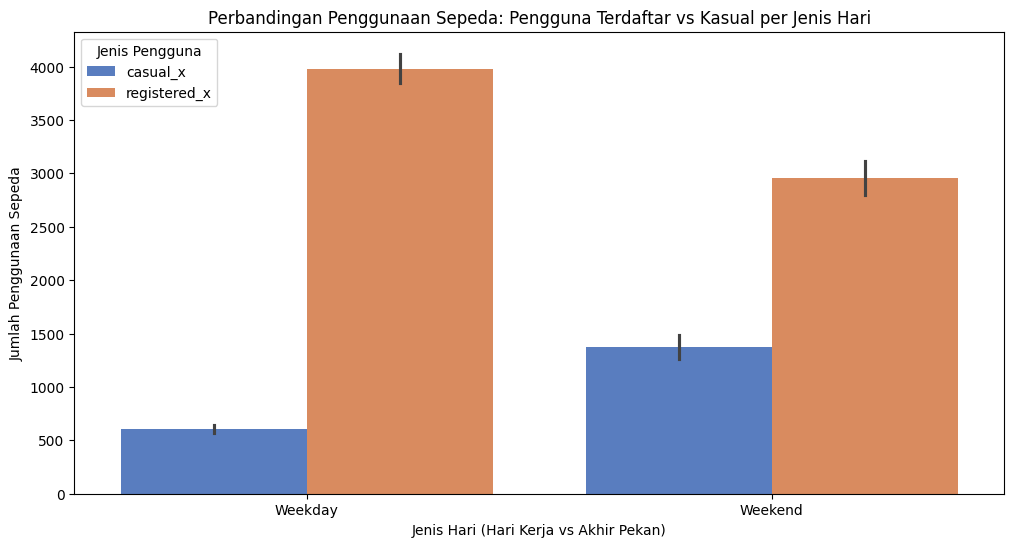

In [122]:
# Membuat kolom baru 'is_working_day' berdasarkan kolom 'workingday_x'.
# Jika 'workingday_x' bernilai 1, maka 'is_working_day' akan berisi 'Weekday',
# jika tidak, akan berisi 'Weekend'.
merged_df['is_working_day'] = merged_df['workingday_x'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend')

# Mengelompokkan data berdasarkan jenis hari (is_working_day),
# jumlah pengguna kasual (casual_x), dan jumlah pengguna terdaftar (registered_x).
# Kemudian, menjumlahkan total penggunaan sepeda (cnt_x) untuk setiap kelompok.
usage_by_day_type = merged_df.groupby(['is_working_day', 'casual_x', 'registered_x'])['cnt_x'].sum().reset_index()

# Mengubah format data agar sesuai untuk visualisasi.
# - id_vars: kolom yang akan dijadikan sebagai identifier (dalam hal ini, 'is_working_day').
# - value_vars: kolom yang akan dijadikan sebagai nilai (dalam hal ini, 'casual_x' dan 'registered_x').
# - var_name: nama kolom baru untuk menampung nama variabel ('user_type').
# - value_name: nama kolom baru untuk menampung nilai ('usage_count').
usage_by_day_type = usage_by_day_type.melt(id_vars=['is_working_day'], value_vars=['casual_x', 'registered_x'],
                                           var_name='user_type', value_name='usage_count')

# Membuat figure (area plot) dengan ukuran 12x6 inci.
plt.figure(figsize=(12, 6))

# Membuat bar plot menggunakan seaborn (sns) dengan:
# - x: jenis hari (is_working_day)
# - y: jumlah penggunaan sepeda (usage_count)
# - hue: jenis pengguna (user_type) untuk mengelompokkan bar berdasarkan jenis pengguna
# - data: DataFrame usage_by_day_type sebagai sumber data
# - palette: 'muted' untuk menentukan skema warna bar
sns.barplot(x='is_working_day', y='usage_count', hue='user_type', data=usage_by_day_type, palette='muted')

# Menambahkan judul plot
plt.title('Perbandingan Penggunaan Sepeda: Pengguna Terdaftar vs Kasual per Jenis Hari')

# Menambahkan label sumbu x
plt.xlabel('Jenis Hari (Hari Kerja vs Akhir Pekan)')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Penggunaan Sepeda')

# Menambahkan legend (keterangan) dengan judul "Jenis Pengguna" dan ditempatkan di kiri atas
plt.legend(title='Jenis Pengguna', loc='upper left')

# Menampilkan plot
plt.show()

**Insight:**
Dengan menggunakan bar plot dapat diketahui bahwa musim dan kondisi cuacah tertentu memiliki pengaruh besar terhadap jumlah order serta Pengguna terdaftar cenderung lebih banyak menggunakan sepeda  Pola ini memberikan persiapan bagi sistem penyewaan sepeda untuk menyesuaikan alokasi sepeda sesuai dengan permintaan yang lebih tinggi pada waktu tertentu

## Analisis Lanjutan (Opsional)

RFM Analysis hour

In [111]:
rfm_hour_df = merged_df.groupby(by="instant", as_index=False).agg({
    "dteday_x": "max",
    "instant": "nunique",
    "cnt_x": "sum"
})
rfm_hour_df.head()

,dteday_x,instant,cnt_x
0,2011-01-01,1,985
1,2011-01-02,1,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600


RFM Analysis day

In [110]:
rfm_day_df = merged_df.groupby(by="dteday_x", as_index=False).agg({
    "dteday_x": "max",
    "instant": "nunique",
    "cnt_x": "sum"
})
rfm_day_df.columns = ["date", "frequency", "monetary"]

rfm_day_df.head()

,date,frequency,monetary
0,2011-01-01,1,985
1,2011-01-02,1,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600


## Conclusion

- 1. Pada analisis data pola penggunaan sepeda berdasarkan musim dan kondisi cuaca, ditemukan bahwa faktor-faktor ini memiliki pengaruh signifikan terhadap tingkat penggunaan sepeda. Penggunaan sepeda cenderung lebih tinggi pada musim semi dan gugur, yang menawarkan cuaca yang nyaman untuk bersepeda, sementara musim dingin dan panas menunjukkan penurunan penggunaan, terutama karena suhu ekstrem yang mempengaruhi kenyamanan. Cuaca cerah meningkatkan penggunaan sepeda, sedangkan kondisi cuaca buruk seperti hujan atau kabut mengurangi minat pengguna untuk bersepeda.
- 2. Pada analisis data  meskipun pengguna terdaftar lebih banyak menggunakan sepeda pada hari kerja dan akhir pekan, pola penggunaan mereka menunjukkan penurunan pada akhir pekan dibandingkan hari kerja. Sebaliknya, pengguna kasual menunjukkan lonjakan penggunaan sepeda yang signifikan pada akhir pekan dibandingkan hari kerja, meskipun jumlah mereka tetap lebih rendah daripada pengguna terdaftar secara keseluruhan.